## <h1><center>Uber Fare Price Prediction</center></h1>
**Problem Statement** <br>
Uber and Lyft's ride prices are not constant like public transport. They are greatly affected by the demand and supply of rides at a given time. So what exactly drives this demand? The first guess would be the time of the day; times around 9 am and 5 pm should see the highest surges on account of people commuting to work/home

## Step 1 : Gathering Data
<p>we gather this data set on kaggle.com. Dataset of cab rides collected for a week in Nov - Dec '18. Collected at a regular interval of 5 mins . to download the dataset please <a href="https://www.kaggle.com/datasets/ravi72munde/uber-lyft-cab-prices">Click</a></p>

### Importing Required Libraries

In [150]:
# import numpy for mathematical operation
import numpy as np

#import pandas for data frame and data manipulation
import pandas as pd

# set dataframe max columns number to display
pd.set_option('display.max_columns',100)

# set max display row by 200
pd.set_option("display.max_rows", 200)

# import matplotlit for visualization
from matplotlib import pyplot as plt

# to display graph and plots in jupyter notebooks 
%matplotlib inline

# import seaborn to easy and various visualization
import seaborn as sns

# set graph /plot background style
sns.set_style('darkgrid') 
# other options for sns.set_style are 'darkgrid', 'whitegrid', 'dark', 'white', and 'ticks'  

## Step 2 : Exploratory Analysis

load data source into program and create dataframe

In [151]:
# to load the csv file into program we use the pd.read_csv() function. it will take the csv file path
df = pd.read_csv('/kaggle/input/uber-lyft-cab-prices/cab_rides.csv')

#### let's check whether the data was successfully loaded or not?

In [152]:
df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


#### Display rows and columns of the dataset

In [153]:
df.shape

(693071, 10)

#### Display the dataframe feauters and theri datatype

In [154]:
df.dtypes

distance            float64
cab_type             object
time_stamp            int64
destination          object
source               object
price               float64
surge_multiplier    float64
id                   object
product_id           object
name                 object
dtype: object

In [155]:
''' Alternative of df.dtype we can use the df.info() function it will display more information about dataframe 
like non-value count, size of dataframe, feauters name and their data types'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  int64  
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  float64
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


#### let's check the some observation of data

In [156]:
df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


after showing some observation we know id feature was not relevant to model training so we remove this features

### 2.2 Distributions
A distribution is simply a way to show all of the possible values for a feature and how often they occur.
#### let's plot histogram to show how numberic feature was distributed

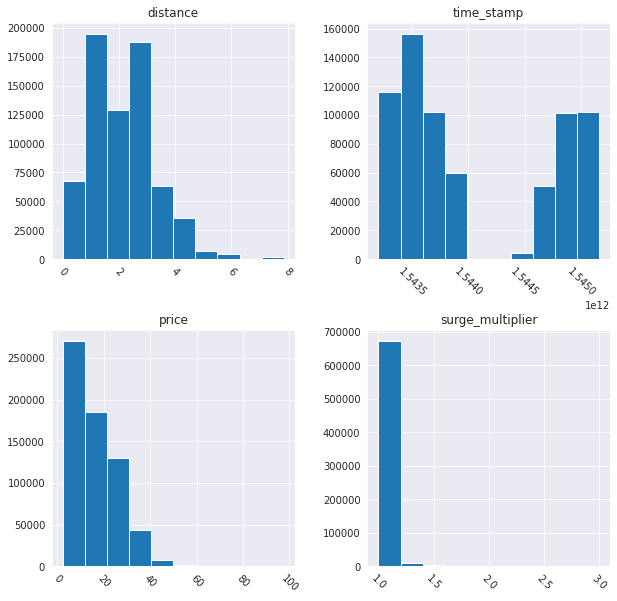

In [157]:
df.hist(figsize=(10,10), xrot=-45)
plt.show()

In [158]:
# display the statistical information of data
df.describe()

,distance,time_stamp,price,surge_multiplier
count,693071.000000,6.930710e+05,637976.000000,693071.000000
mean,2.189430,1.544046e+12,16.545125,1.013870
std,1.138937,6.891925e+08,9.324359,0.091641
min,0.020000,1.543204e+12,2.500000,1.000000
25%,1.280000,1.543444e+12,9.000000,1.000000
50%,2.160000,1.543737e+12,13.500000,1.000000
75%,2.920000,1.544828e+12,22.500000,1.000000
max,7.860000,1.545161e+12,97.500000,3.000000


In [159]:
# let's displat statistical information of categorial features
df.describe(include=['object'])

,cab_type,destination,source,id,product_id,name
count,693071,693071,693071,693071,693071,693071
unique,2,12,12,693071,13,13
top,Uber,Financial District,Financial District,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
freq,385663,58851,58857,1,55096,55096


In [160]:
df.nunique()

distance               549
cab_type                 2
time_stamp          114335
destination             12
source                  12
price                  147
surge_multiplier         7
id                  693071
product_id              13
name                    13
dtype: int64

In [161]:
# after showing this information we decided to remove the id feauter
df.drop('id', axis=1,inplace=True)

In [162]:
# to check wetherthe id was removed or not?
print(df.columns)

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'product_id', 'name'],
      dtype='object')


### Display the distribution of categorical features using countplot

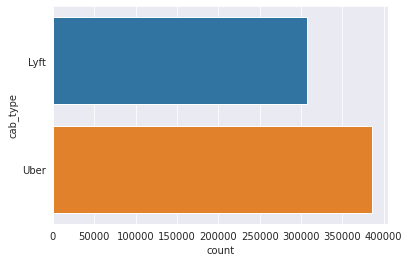

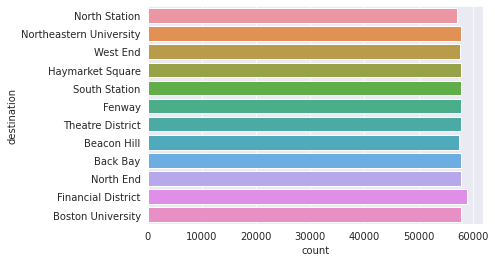

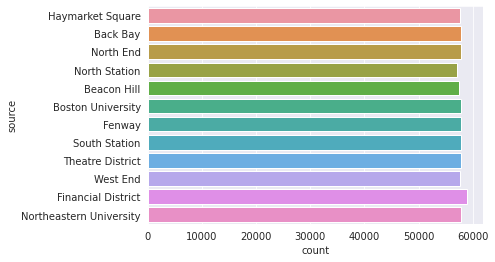

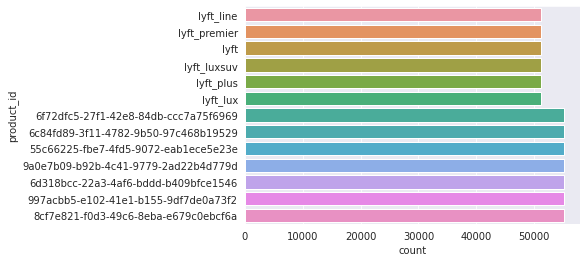

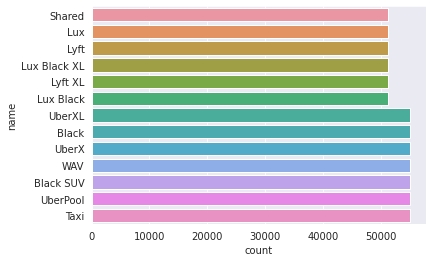

In [163]:
for feauterName in df.dtypes[df.dtypes == 'object'].index:
    sns.countplot(y=feauterName , data=df)
    plt.show()

### 2.3 Segmentation

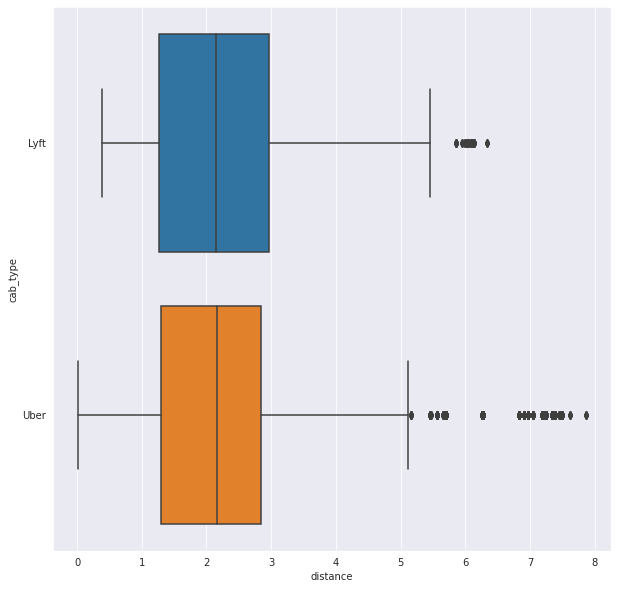

In [164]:
plt.figure(figsize=(10,10))
sns.boxplot(x='distance',y='cab_type', data=df)
plt.show()

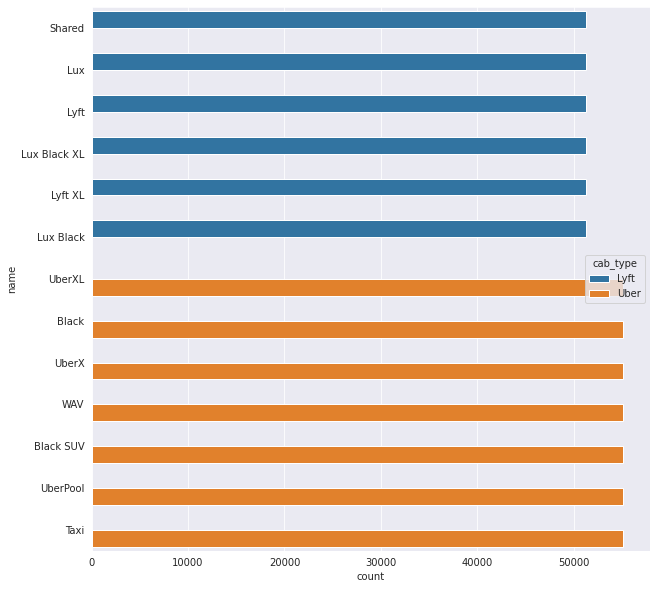

In [165]:
plt.figure(figsize=(10,10))
sns.countplot(y='name',data=df, hue='cab_type')
plt.show()

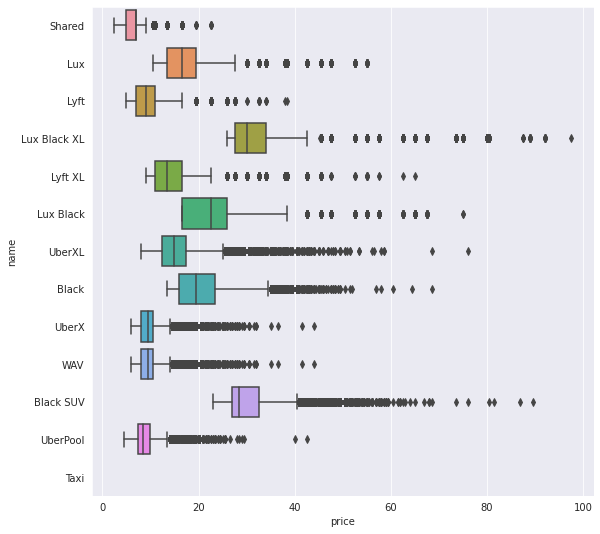

In [166]:
plt.figure(figsize=(9,9))
sns.boxplot(x='price',y='name' , data=df)
plt.show()

In [167]:
df.groupby('name').mean()

,distance,time_stamp,price,surge_multiplier
name,,,,
Black,2.191399,1.544045e+12,20.523786,1.000000
Black SUV,2.191378,1.544045e+12,30.286763,1.000000
Lux,2.186968,1.544042e+12,17.771240,1.037177
Lux Black,2.186968,1.544047e+12,23.062468,1.037177
Lux Black XL,2.186968,1.544046e+12,32.324086,1.037177
Lyft,2.186968,1.544043e+12,9.610885,1.038045
Lyft XL,2.186968,1.544046e+12,15.309363,1.038045
Shared,2.187012,1.544047e+12,6.029893,1.000000
Taxi,2.191383,1.544046e+12,NaN,1.000000


### 2.4 Correlations

In [168]:
corr = df.corr()

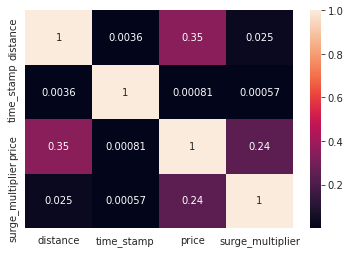

In [169]:
sns.heatmap(corr , annot=True)
plt.show()

get better visualization we increase the figure size <br>
add some attribute of heatmap 
<ul>
    <li><b>fmt='format'</b> These attribute display annotation value in specified format (eg. only remove presion value using .0f )</li> 
    <li><b>annot=boolean</b>The annot= argument controls whether to annotate each cell with its value. By default, it's False</li>
    <li><b>cmap='color map</b> display heatmap with different color argument like ='RdBu_r' , 'RdBu','crest'</li>
    <li>we multiply correlation value with 100 so we can easily undestand the relationship value </li>

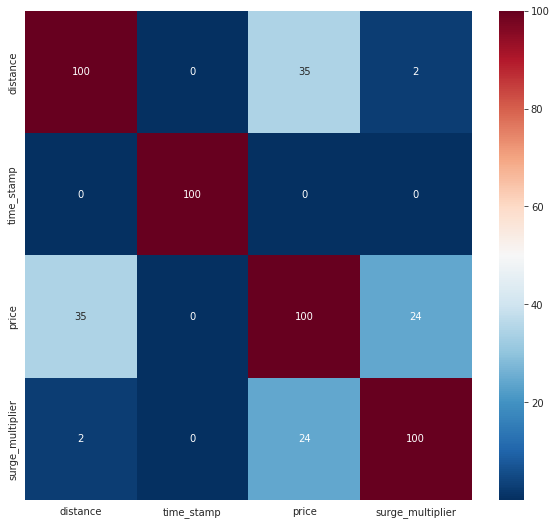

In [170]:
plt.figure(figsize=(10,9))
sns.heatmap(corr*100 , fmt='.0f',annot=True,cmap='RdBu_r')
plt.show()

In [171]:
new_df = df.copy()
new_df = pd.get_dummies(df,columns=['name','source','destination','cab_type'])

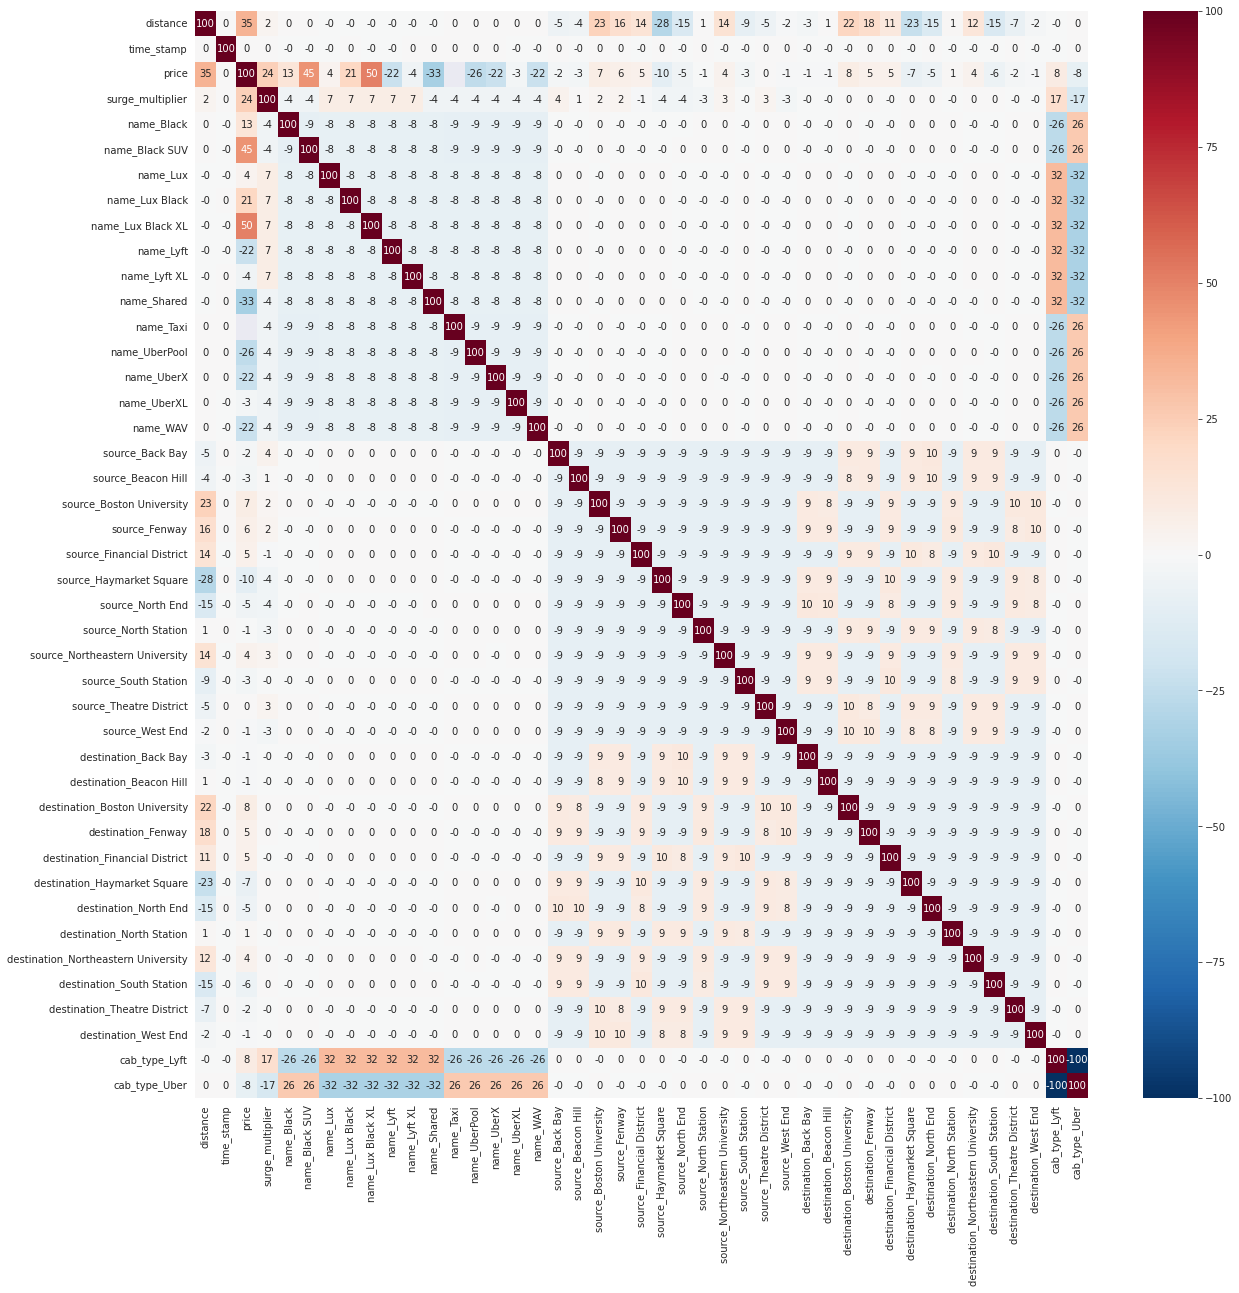

In [172]:
corr = new_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr*100 , fmt='.0f',annot=True,cmap='RdBu_r')
plt.show()

### Step 3 : Data Cleaning

In [173]:
# first we remove the duplicate observations
oldRows , oldCols = df.shape
df.drop_duplicates(inplace=True)
newRows , newCols = df.shape
print('Total ',oldRows - newRows,' duplicate observation removed')

Total  124  duplicate observation removed


In [174]:
df = df.drop('product_id',axis=1)

#### checking for any null values

In [175]:
df.isnull().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55042
surge_multiplier        0
name                    0
dtype: int64

In [176]:
# we have 55042 records that have not price so we drop this values
print(df.shape)
df = df[new_df.price.isnull() != True]
mask = pd.isnull(df.price)
df = df[mask==False]
print(df.isnull().sum())

(692947, 8)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


distance            0
cab_type            0
time_stamp          0
destination         0
source              0
price               0
surge_multiplier    0
name                0
dtype: int64


In [177]:
df.shape

(637905, 8)

#### checking for Outliers

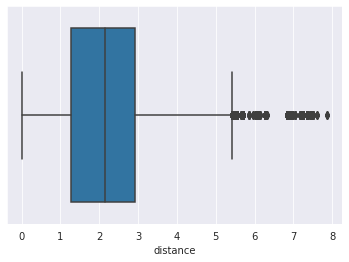

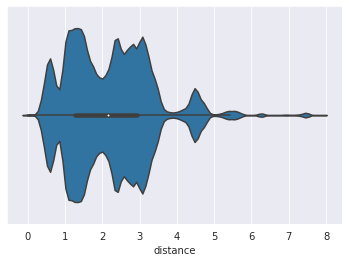

In [178]:
sns.boxplot(x='distance' , data= df)
plt.show()
sns.violinplot(x='distance', data=df)
plt.show()

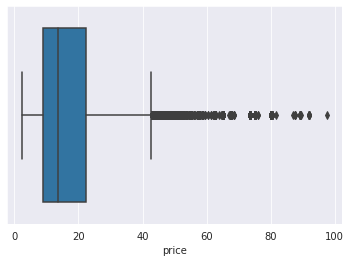

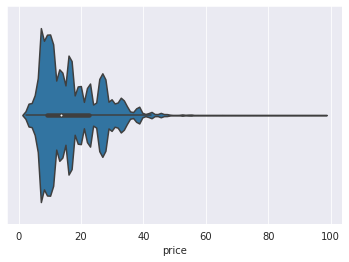

In [179]:
sns.boxplot(x='price',data=df)
plt.show()
sns.violinplot(x='price', data=df)
plt.show()

### Step 4 : Feature Engineering

#### let's create datetime new feature using time_stamp

In [180]:
df['DateTime'] = pd.to_datetime(df.time_stamp,unit='ms')

In [181]:
#df['year'] = df.DateTime.dt.year
df['month'] = df.DateTime.dt.month
df['day'] = df.DateTime.dt.day
df['Time'] = df.DateTime.dt.strftime('%H:%M:%S')
df['hour'] = df.DateTime.dt.hour
df['minute']  = df.DateTime.dt.minute

In [182]:
df.sort_values(['Time','price','distance']).head(10)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,name,DateTime,month,day,Time,hour,minute
71081,0.65,Lyft,1544745603860,West End,Haymarket Square,3.0,1.0,Shared,2018-12-14 00:00:03.860,12,14,00:00:03,0,0
38517,2.54,Lyft,1545091203539,Theatre District,Northeastern University,3.0,1.0,Shared,2018-12-18 00:00:03.539,12,18,00:00:03,0,0
473593,1.06,Lyft,1544745603860,Northeastern University,Back Bay,5.0,1.0,Shared,2018-12-14 00:00:03.860,12,14,00:00:03,0,0
80983,0.49,Uber,1545091203618,North Station,Haymarket Square,7.0,1.0,UberX,2018-12-18 00:00:03.618,12,18,00:00:03,0,0
278033,0.99,Lyft,1544832003982,North End,North Station,7.0,1.0,Lyft,2018-12-15 00:00:03.982,12,15,00:00:03,0,0
473594,1.06,Lyft,1544745603860,Northeastern University,Back Bay,7.0,1.0,Lyft,2018-12-14 00:00:03.860,12,14,00:00:03,0,0
473590,1.27,Lyft,1544745603860,Beacon Hill,Haymarket Square,7.0,1.0,Lyft,2018-12-14 00:00:03.860,12,14,00:00:03,0,0
523736,1.36,Lyft,1545091203618,Beacon Hill,Haymarket Square,7.0,1.0,Lyft,2018-12-18 00:00:03.618,12,18,00:00:03,0,0
523741,2.48,Uber,1545091203618,South Station,Beacon Hill,8.5,1.0,UberX,2018-12-18 00:00:03.618,12,18,00:00:03,0,0
32413,2.48,Uber,1544832003982,Beacon Hill,Fenway,9.5,1.0,UberX,2018-12-15 00:00:03.982,12,15,00:00:03,0,0


In [183]:
df.sort_values(['Time','price','distance']).tail(1000)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,name,DateTime,month,day,Time,hour,minute
275550,3.45,Uber,1543535878653,South Station,Back Bay,26.5,1.0,Black,2018-11-29 23:57:58.653,11,29,23:57:58,23,57
597464,1.04,Lyft,1543795078995,North End,North Station,27.5,1.0,Lux Black XL,2018-12-02 23:57:58.995,12,2,23:57:58,23,57
631517,1.13,Lyft,1543708678247,Haymarket Square,Financial District,27.5,1.0,Lux Black XL,2018-12-01 23:57:58.247,12,1,23:57:58,23,57
428814,1.57,Uber,1543881478894,North End,Theatre District,27.5,1.0,Black SUV,2018-12-03 23:57:58.894,12,3,23:57:58,23,57
496383,2.79,Uber,1543708678054,Beacon Hill,Boston University,29.5,1.0,Black SUV,2018-12-01 23:57:58.054,12,1,23:57:58,23,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598295,1.24,Uber,1543449548316,Theatre District,Northeastern University,27.0,1.0,Black SUV,2018-11-28 23:59:08.316,11,28,23:59:08,23,59
415937,1.30,Uber,1543449548205,Theatre District,South Station,27.0,1.0,Black SUV,2018-11-28 23:59:08.205,11,28,23:59:08,23,59
476258,0.39,Uber,1543449548148,South Station,Financial District,27.5,1.0,Black SUV,2018-11-28 23:59:08.148,11,28,23:59:08,23,59
81807,2.79,Uber,1543449548308,Beacon Hill,Boston University,29.5,1.0,Black SUV,2018-11-28 23:59:08.308,11,28,23:59:08,23,59


In [184]:
ABT = pd.get_dummies(df,columns=['name','source','destination','cab_type'])

In [185]:
ABT.head()

,distance,time_stamp,price,surge_multiplier,DateTime,month,day,Time,hour,minute,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,cab_type_Lyft,cab_type_Uber
0,0.44,1544952607890,5.0,1.0,2018-12-16 09:30:07.890,12,16,09:30:07,9,30,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0.44,1543284023677,11.0,1.0,2018-11-27 02:00:23.677,11,27,02:00:23,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0.44,1543366822198,7.0,1.0,2018-11-28 01:00:22.198,11,28,01:00:22,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0.44,1543553582749,26.0,1.0,2018-11-30 04:53:02.749,11,30,04:53:02,4,53,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,0.44,1543463360223,9.0,1.0,2018-11-29 03:49:20.223,11,29,03:49:20,3,49,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


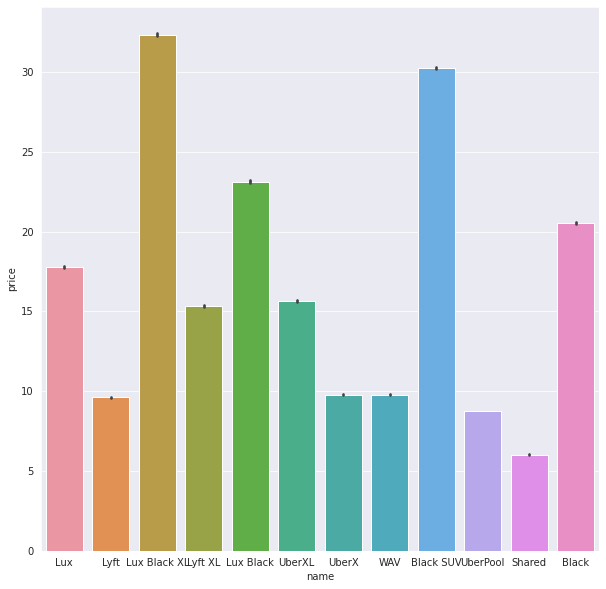

In [186]:
night_mask = (df.DateTime.dt.hour >= 5) & (df.DateTime.dt.hour <= 18)
plt.figure(figsize=(10,10))
sns.barplot(x='name', y = 'price' ,data=df[night_mask!=True])
plt.show()

In [187]:
ABT.drop(['DateTime','Time'],axis=1,inplace=True)

In [188]:
ABT.to_csv('CleanData.csv', index=None)

In [189]:
df = pd.read_csv("CleanData.csv")

### Step 4 : Algorithm Selection

In [190]:
# importing sklearn Required  Libraries

from sklearn.linear_model import Lasso , Ridge , ElasticNet, LinearRegression

from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV ,train_test_split

from sklearn.metrics import r2_score ,mean_absolute_error 

from sklearn.pipeline import Pipeline,make_pipeline

from sklearn.preprocessing import StandardScaler

from datetime import datetime

import pickle
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV


##### Spilt the data set into training and testing set

In [191]:
features = df.drop('price',axis=1)
target = df.price

x_train,x_test, y_train,y_test = train_test_split(features,target,test_size=0.2)

In [192]:
print(len(x_train) , len(y_train), len(x_test) , len(y_test))

510324 510324 127581 127581


### Preprocessing and Pipline

In [193]:
piplines = {
    'lasso' : make_pipeline(StandardScaler(),Lasso()),
    'ridge' : make_pipeline(StandardScaler(), Ridge()),
    'Elnet' :make_pipeline(StandardScaler(),ElasticNet()),
    'rf' : make_pipeline(StandardScaler(),RandomForestRegressor()),
    'gb' : make_pipeline(StandardScaler(),GradientBoostingRegressor())
}

In [194]:
lasso_hyperparamters = {
      'lasso__alpha' : [0.001,0.005,0.01,0.05,0.1,0.5,1,5,10]
    
}

ridge_hyperparamters = {
    'ridge__alpha' : [0.001,0.005,0.01,0.05,0.1,0.5,1,5,10]
}

elnet_hyperparamters = {
    'elasticnet__alpha' : [0.001,0.005,0.01,0.05,0.1,0.5,1,5,10],
    'elasticnet__l1_ratio' : [0.1,0.3,0.7,0.9]
}

rf_hyperparameters = { 
    'randomforestregressor__n_estimators' : [100, 200],
    'randomforestregressor__max_features': ['auto', 'sqrt', 'log2'],
}

gb_hyperparameters = { 
    'gradientboostingregressor__n_estimators': [100, 200],
    'gradientboostingregressor__learning_rate' : [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth': [1, 3, 5]
}

In [195]:
hyperparamters = {
    'lasso' : lasso_hyperparamters,
    'ridge' : ridge_hyperparamters,
    'Elnet' : elnet_hyperparamters,
    'rf' :rf_hyperparameters,
    'gb' : gb_hyperparameters
}

In [196]:
Liner_pipeline = make_pipeline(StandardScaler(),LinearRegression())
#liner_model = LinearRegression()
print(datetime.now().strftime("%H:%M:%S"))
Liner_pipeline.fit(x_train,y_train)
print(datetime.now().strftime("%H:%M:%S"))

09:07:57
09:07:58


In [197]:
pred = Liner_pipeline.predict(x_test)

In [198]:
print("Linear Regression model \n ---------------------------------------")
print("R2 = {0:.3f}".format(r2_score(y_test,pred)))
print("Mean absolute Error = {0:.3f}".format(mean_absolute_error(y_test,pred)))

Linear Regression model 
 ---------------------------------------
R2 = 0.928
Mean absolute Error = 1.749


In [199]:
ridge_model = GridSearchCV(piplines['ridge'],hyperparamters['ridge'],cv=5 ,n_jobs=-1)

In [200]:
print(datetime.now().strftime("%H:%M:%S"))
ridge_model.fit(x_train,y_train)
print(datetime.now().strftime("%H:%M:%S"))

09:08:13
09:08:31


In [201]:
print("Ridge")
print("Best Score = {0:.3f}".format(ridge_model.best_score_))
pred = ridge_model.predict(x_test)

print("r2 = {0:.3f}".format( r2_score(y_test,pred)))
print("MAE = {0:.3f}".format(mean_absolute_error(y_test,pred)))

Ridge
Best Score = 0.929
r2 = 0.928
MAE = 1.749


In [202]:
lasso_model = GridSearchCV(piplines['lasso'],hyperparamters['lasso'],cv=5,n_jobs=-1)

In [203]:
print(datetime.now().strftime("%H:%M:%S"))
lasso_model.fit(x_train,y_train)
print(datetime.now().strftime("%H:%M:%S"))

09:08:31
09:12:32


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.959e+04, tolerance: 4.450e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [204]:
print("Lasso ")
print("Best Score = {0:.3f}".format(lasso_model.best_score_))
pred = lasso_model.predict(x_test)

print("r2 = {0:.3f}".format( r2_score(y_test,pred)))
print("MAE = {0:.3f}".format(mean_absolute_error(y_test,pred)))

Lasso 
Best Score = 0.929
r2 = 0.928
MAE = 1.749


In [206]:
gbModel = HalvingGridSearchCV(piplines['gb'],hyperparamters['gb'],cv=5,n_jobs=-1)

In [207]:
print(datetime.now().strftime("%H:%M:%S"))
gbModel.fit(x_train,y_train)
print(datetime.now().strftime("%H:%M:%S"))

09:12:32


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.172e+04, tolerance: 3.557e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.167e+04, tolerance: 3.565e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

10:02:36


In [208]:
print("Gradient Booster Regression")
print("Best Score = {0:.3f}".format(gbModel.best_score_))
pred = gbModel.predict(x_test)

print("r2 = {0:.3f}".format( r2_score(y_test,pred)))
print("MAE = {0:.3f}".format(mean_absolute_error(y_test,pred)))

Gradient Booster Regression
Best Score = 0.969
r2 = 0.968
MAE = 1.078


In [209]:
Elnet_model = HalvingGridSearchCV(piplines['Elnet'],hyperparamters['Elnet'],cv=5,n_jobs=-1)

In [210]:
print(datetime.now().strftime("%H:%M:%S"))
Elnet_model.fit(x_train,y_train)
print(datetime.now().strftime("%H:%M:%S"))

10:02:37
10:10:35


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.959e+04, tolerance: 4.450e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [211]:
print("Elastic-Net ")
print("Best Score = {0:.3f}".format(Elnet_model.best_score_))
pred = Elnet_model.predict(x_test)

print("r2 = {0:.3f}".format( r2_score(y_test,pred)))
print("MAE = {0:.3f}".format(mean_absolute_error(y_test,pred)))

Elastic-Net 
Best Score = 0.929
r2 = 0.928
MAE = 1.749


In [212]:
rf_model = HalvingGridSearchCV(piplines['rf'],hyperparamters['rf'],cv=5,n_jobs=-1)

In [213]:
print(datetime.now().strftime("%H:%M:%S"))
rf_model.fit(x_train,y_train)
print(datetime.now().strftime("%H:%M:%S"))

10:10:35


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.433e+04, tolerance: 1.295e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.729e+03, tolerance: 1.324e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

11:32:39


In [214]:
print("Random Forest Regression")
print("Best Score {0:.3f}".format(rf_model.best_score_))
pred = rf_model.predict(x_test)

print("r2 = {0:.3f}".format( r2_score(y_test,pred)))
print("MAE = {0:.3f}".format(mean_absolute_error(y_test,pred)))

Random Forest Regression
Best Score 0.966
r2 = 0.966
MAE = 1.089
